# In this kernel, i'm trying to create a classifier with higher accuracy.

Most of the information of the data can be viewed here http://archive.ics.uci.edu/ml/datasets/heart+disease

The following are the steps:
1. **Data importing and analysis**: Simple analysis by overviewing the data, info, mean values, null values, shape etc
2. **Data Visualization**: Viewing the values in the data to understand the distribution
3. **Model Creation**: Creating a classifier model with appropriate parameters
4. **Hyperparameter tuning**: Tuning the hyperparameters to achieve better accuracy

# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('../input/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Dataset explanation for unknown terms
* cp - chest pain type 
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl 
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg - resting electrocardiographic results 
* thalach - maximum heart rate achieved 
* exang - exercise induced angina (1 = yes; 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - have disease or not (1=yes, 0=no)

Setting up the style for the visualizaiton. You can also view the available styles by
#plt.style.available

# Data Visualization

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

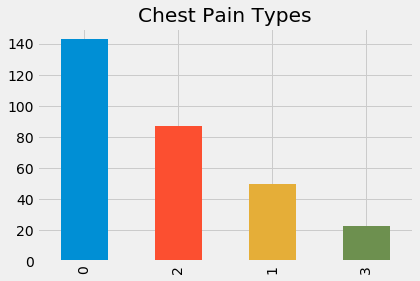

In [8]:
data['cp'].value_counts().plot(kind='bar', title='Chest Pain Types',align='center');

#### * Type 0: typical angina
#### * Type 1: atypical angina
#### * Type 2: non-anginal pain
#### * Type 3: asymptomatic

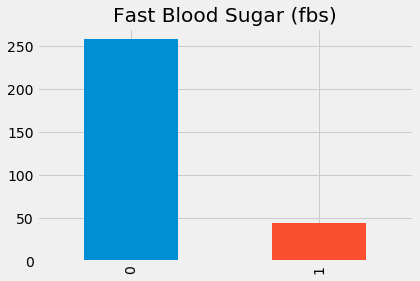

In [9]:
data['fbs'].value_counts().plot(kind='bar', title='Fast Blood Sugar (fbs)',align='center');

### Angina is a type of chest pain caused by reduced blood flow to the heart. Considering the dataset, it is given as exercise induce angina, so we must look for the age factor

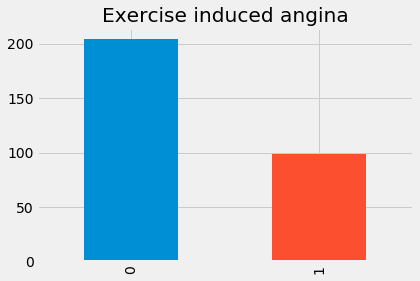

In [10]:
data['exang'].value_counts().plot(kind='bar', title='Exercise induced angina',align='center');

Text(0, 0.5, 'ST Depression Peak')

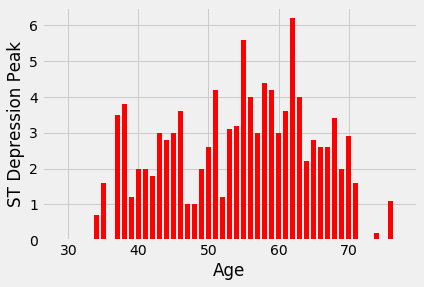

In [11]:
plt.bar(data['age'],data['oldpeak'],color='r')
plt.xlabel('Age')
plt.ylabel('ST Depression Peak')

### Looks like the ST Depression peak occurs mostly for people aged between 55 to 65

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


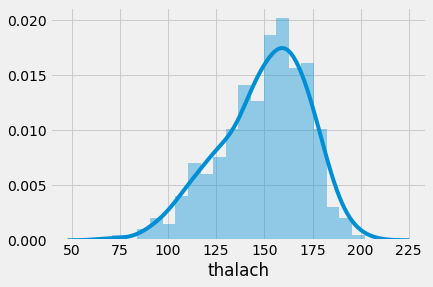

In [12]:
sns.distplot(data['thalach'],bins=20,hist=True,)

#### Most of the thalach values are between 150-160

Text(0.5, 1.0, 'Age vs Cholestrol Level')

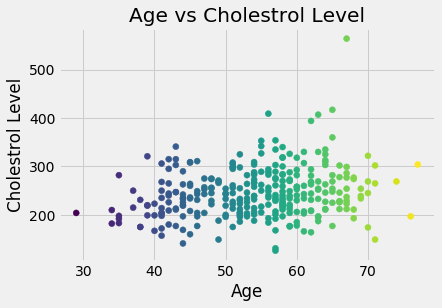

In [13]:
fig,ax = plt.subplots()
ax.scatter(data['age'],data['chol'],c=data.age)
ax.set_xlabel('Age')
ax.set_ylabel('Cholestrol Level')
ax.set_title('Age vs Cholestrol Level')

### as the age increases, the cholestrol level also increases

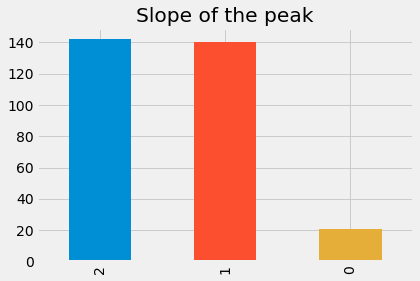

In [14]:
data['slope'].value_counts().plot(kind='bar', title='Slope of the peak',align='center');

* Value 0: upsloping 
* Value 1: flat 
* Value 2: downsloping 

Text(0, 0.5, 'Count')

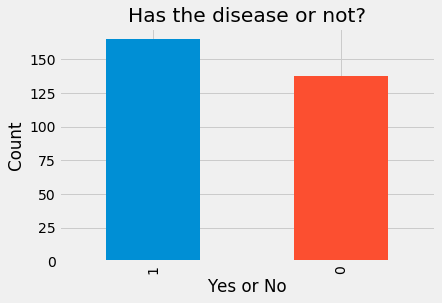

In [15]:
data['target'].value_counts().plot(kind='bar', title='Has the disease or not?',align='center');
plt.xlabel('Yes or No')
plt.ylabel('Count')

#### Using pairplot, we can try to look at the correlation between the features

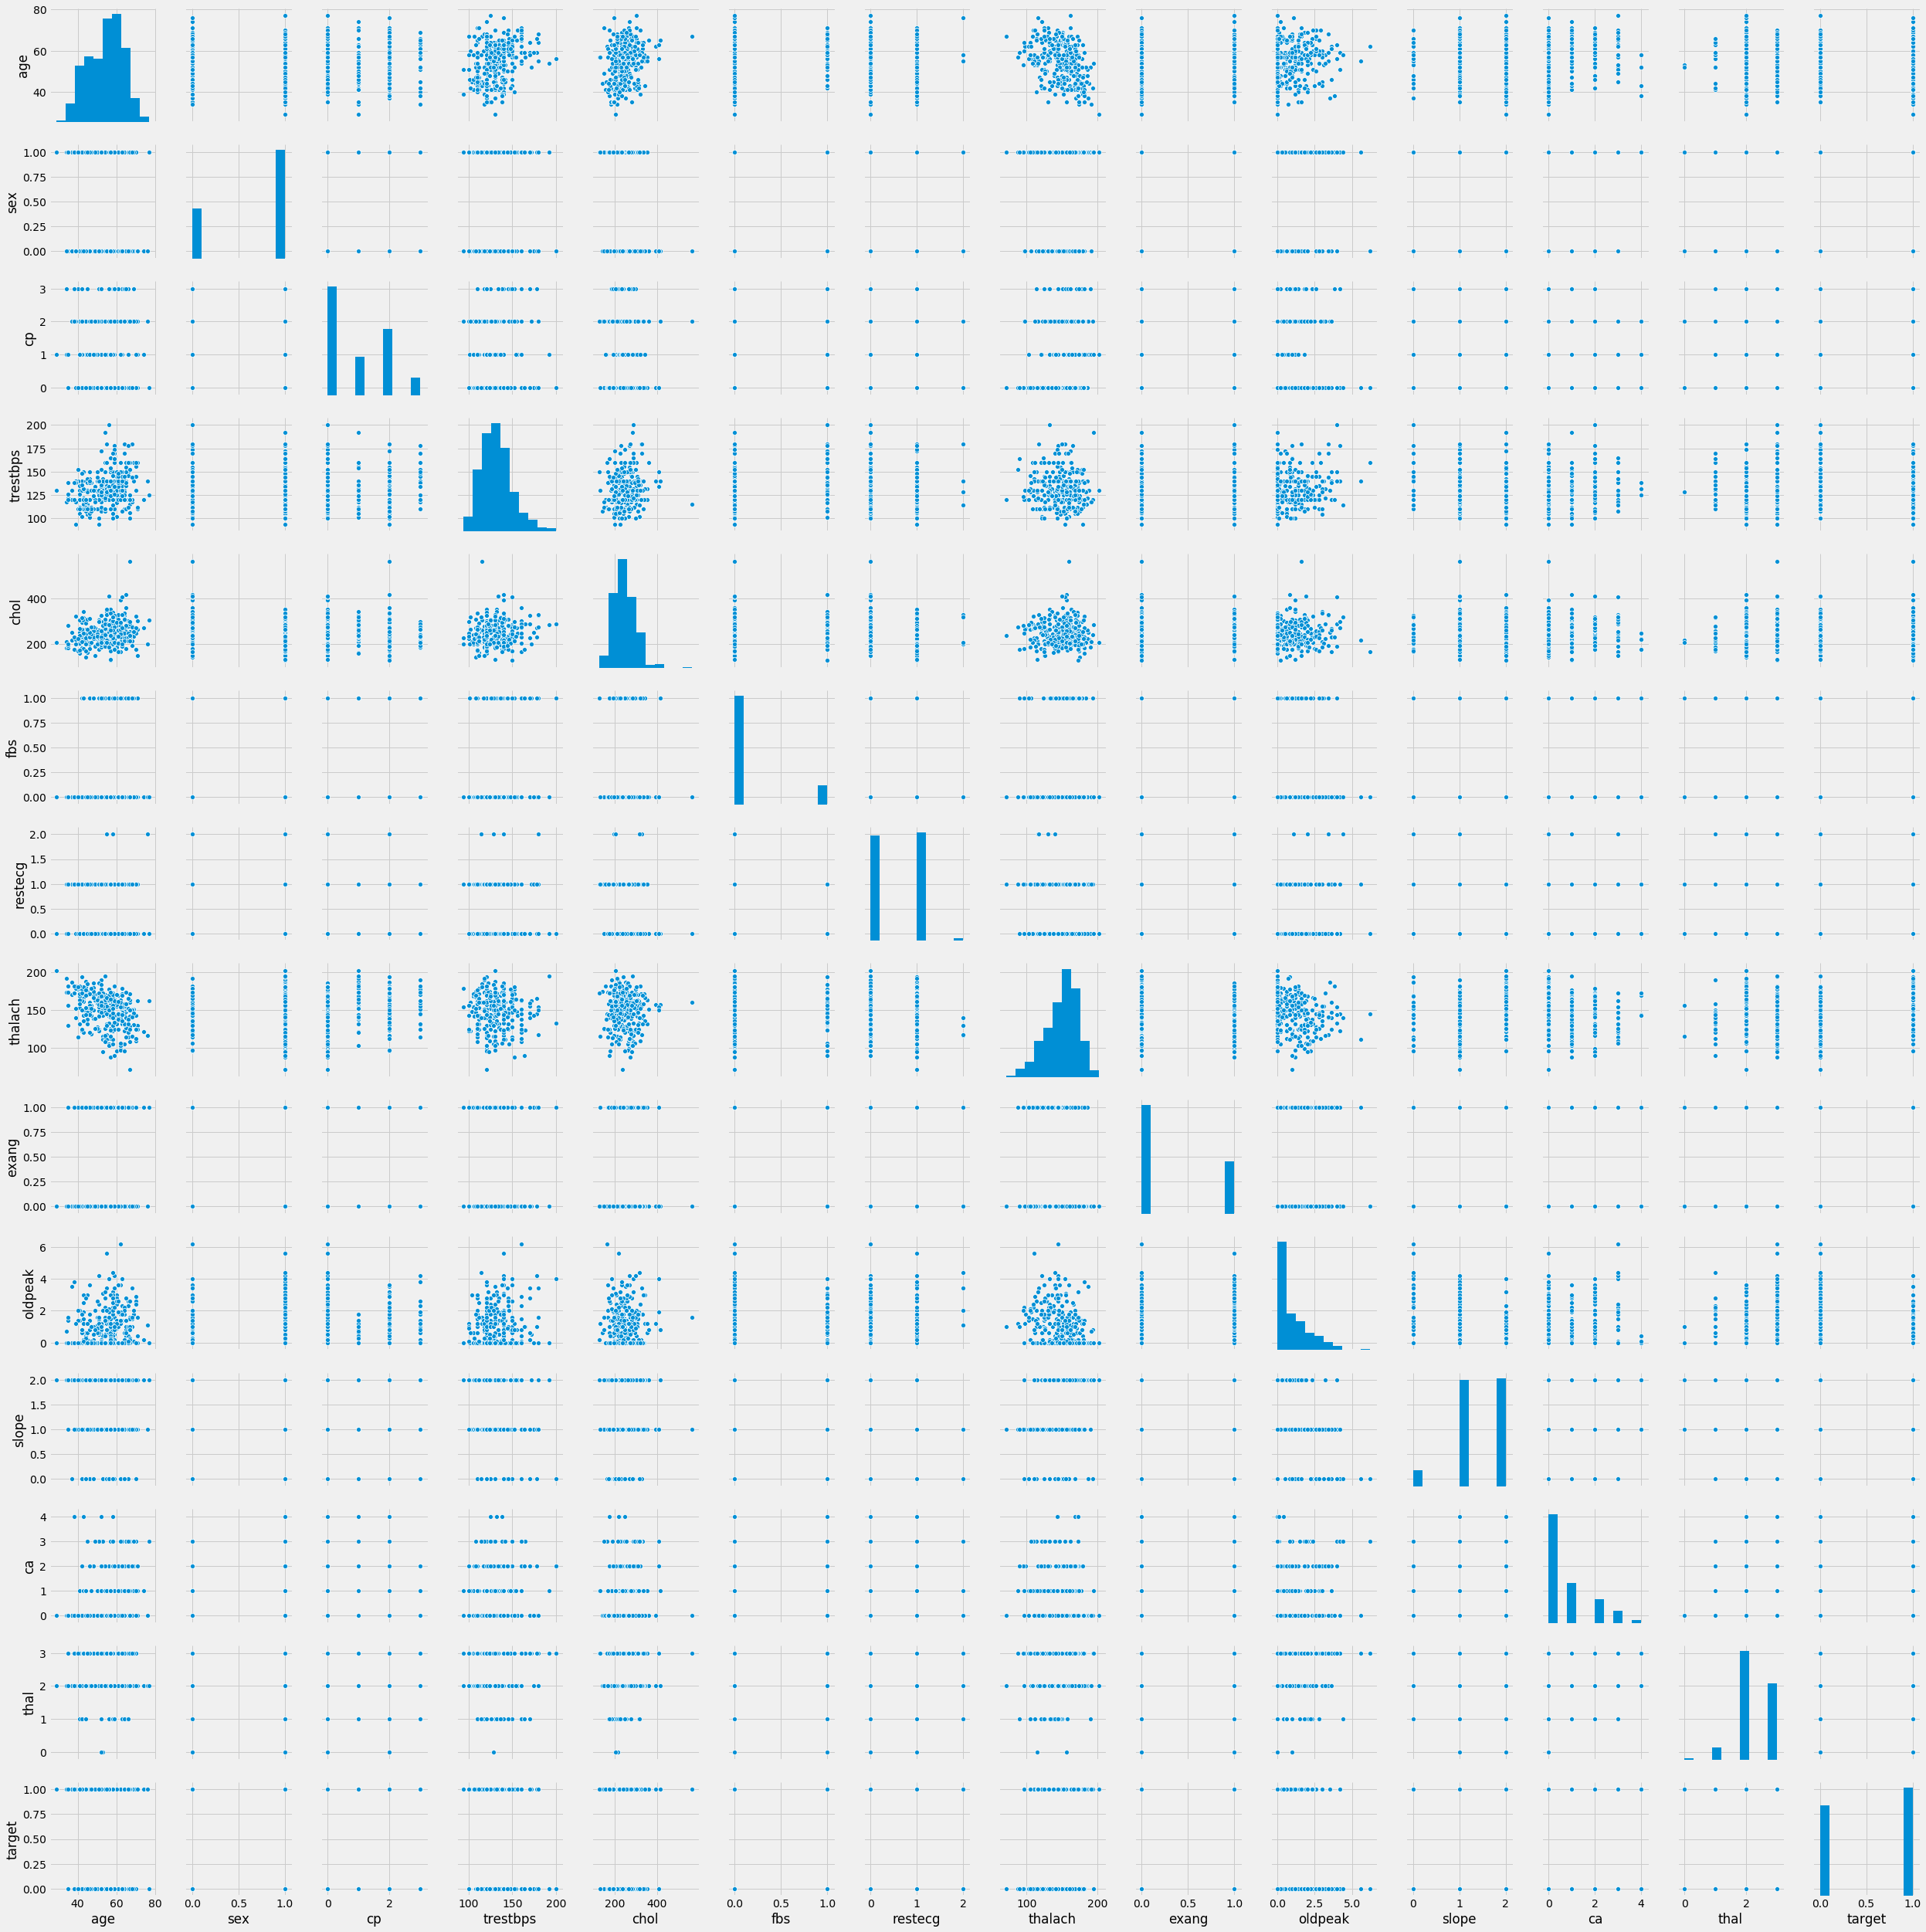

In [16]:
sns.pairplot(data)

Since we have categorical columns, it is good if we split them using get_dummies or one hot encoder, so that our model accuracy could be improved

In [17]:
cp_categories = pd.get_dummies(data['cp'], prefix = "cp")
thal_categroies = pd.get_dummies(data['thal'], prefix = "thal")
Slope_categories = pd.get_dummies(data['slope'], prefix = "slope")
data.drop(['cp','thal','slope'],axis=1,inplace=True)

In [18]:
data = pd.concat([data,cp_categories,thal_categroies,Slope_categories], axis = 1)

In [19]:
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


# Model Creation

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

### Instantiate the models

In [21]:
xtreme = xgb.XGBClassifier(learning_rate=0.1,n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=2)
rf = RandomForestClassifier(random_state=1,n_estimators=1000)
lr = LogisticRegression()
dt = DecisionTreeClassifier(criterion='gini',max_depth=8)
svc = SVC(random_state=1)

#ada = AdaBoostClassifier(n_)
#model = VotingClassifier(estimators=[lr,knn,rf])

Set the X and y values. 

'Target' is our dependent variable (target variable), rest all are features

In [22]:
y = data['target']
X = data.drop(['target'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
names = ['KNN','LogisticRegression','Decision Tree','Gradient Boost','Random Forest','SVM']
scores = []
def accuracy(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

In [25]:
models = [knn, lr, dt, xtreme, rf, svc]
for i in models:
    accuracy(i,X_train, y_train, X_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
scores

[0.639344262295082,
 0.9016393442622951,
 0.8032786885245902,
 0.8360655737704918,
 0.8852459016393442,
 0.5245901639344263]

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

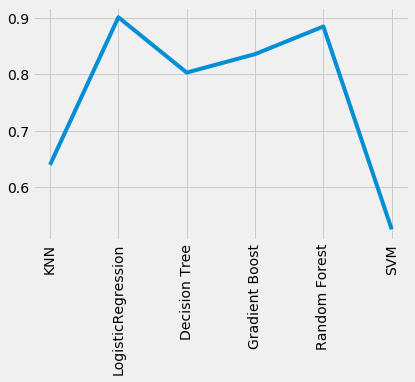

In [27]:
plt.plot(names,scores)
plt.xticks(rotation=90)

# Hyperparameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV

### KNN

In [29]:
neighbors = np.arange(1,20)
parameters = {'n_neighbors':neighbors}

In [30]:
knn_grid = GridSearchCV(estimator=knn,param_grid=parameters,cv=5)
#knn_grid.fit(X_train,y_train)

In [31]:
knn_grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
knn_grid.best_params_

{'n_neighbors': 3}

In [33]:
y_pred = knn_grid.predict(X_test)

In [34]:
knn_new = accuracy_score(y_test,y_pred)

### Random Forest

In [35]:
max_fea = np.random.randint(1,11) #select a random int value
m_split = np.random.randint(2, 11)

In [36]:
params = {"max_depth": [1,8,None], #just gave numbers i felt that would be good. More numbers we give, more time it would take
             "max_features": [max_fea],
              "min_samples_split": [m_split],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
#No of iterations: 3 * 1 * 1 * 2 * 2 * no of folds.

In [37]:
rf_grid = GridSearchCV(estimator=rf,param_grid=params,cv=3)

In [38]:
rf_grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 8, None], 'max_features': [9], 'min_samples_split': [5], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 9,
 'min_samples_split': 5}

In [40]:
y_pred = rf_grid.predict(X_test)
rf_new = accuracy_score(y_test,y_pred)

### XGBoost

In [41]:
params = {
        'learning_rate': [0.1,0.05,0.01],
        'min_child_weight': [1, 5, 10],
        'gamma': [1,5],
        'max_depth': [3, 4, 5],
        'n_estimator':[100,1000]
        }

In [42]:
xg_grid = GridSearchCV(estimator=xtreme,param_grid=params,cv=3)
xg_grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.05, 0.01], 'min_child_weight': [1, 5, 10], 'gamma': [1, 5], 'max_depth': [3, 4, 5], 'n_estimator': [100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
xg_grid.best_params_

{'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimator': 100}

In [44]:
y_pred = xg_grid.predict(X_test)
xgb_new = accuracy_score(y_test,y_pred)

### Logistic Regression

In [45]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
params = dict(C=C, penalty=penalty)

In [46]:
lr_grid = GridSearchCV(estimator=lr,param_grid=params,cv=3)
lr_grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
lr_grid.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [48]:
y_pred = lr_grid.predict(X_test)
lr_new = accuracy_score(y_test,y_pred)

### SVM

In [49]:
Cs =[0.01]
gammas = [0.001, 0.01]
kernels = ['linear', 'rbf']
params = {'C': Cs, 'gamma' : gammas,'kernel':kernels}

In [50]:
grid = GridSearchCV(estimator=svc,param_grid=params,cv=3)
grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01], 'gamma': [0.001, 0.01], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid.best_params_

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [52]:
y_pred = grid.predict(X_test)
svm_new = accuracy_score(y_test,y_pred)

## Decision Trees

In [53]:
max_dep = np.arange(3, 10)
cri = ['gini','entropy']

params= {'max_depth': max_dep,'criterion':cri}

In [54]:
dt_grid = GridSearchCV(estimator=dt,param_grid=params,cv=3)

In [55]:
dt_grid.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [57]:
y_pred = dt_grid.predict(X_test)
dt_new = accuracy_score(y_test,y_pred)

In [58]:
names = ['KNN','LogisticRegression','Decision Tree','Gradient Boost','Random Forest','SVM']

In [59]:
new_scores= [knn_new,lr_new,dt_new,xgb_new,rf_new,svm_new]

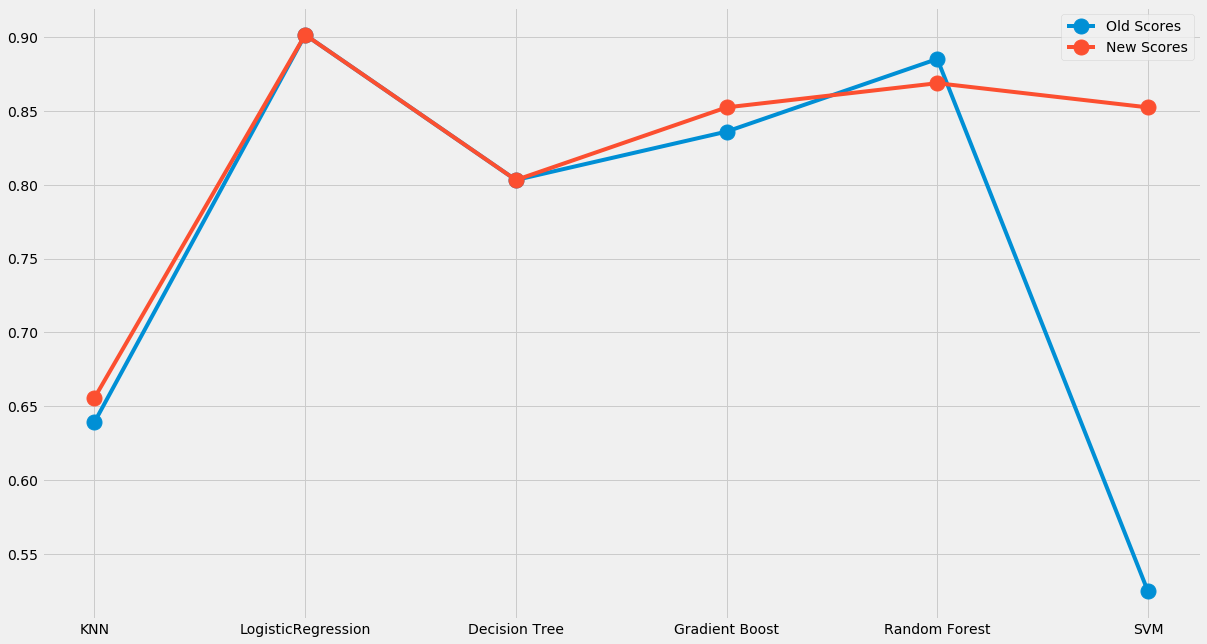

In [60]:
fig, ax = plt.subplots()
ax.plot(names,scores,marker = 'o',markersize=15)
ax.plot(names,new_scores,marker='o',markersize=15)
ax.legend(['Old Scores','New Scores'])
fig.set_size_inches(18.5, 10.5)

## Now we can look at the model with the best accuracy. 

## Ofcourse we can try creating and tuning other classifiers. Also, we can improve the accuracy by adding more params during the cross validation. I just wanted to share my learning experience of hyperparameter tuning. 

## Thanks. I would appreciate your inputs and comments